# Author : Aditya Gupta

# Data Science and Business Analytics Internship

# GRIP THE SPARK FOUNDATION

# ###GRIPDEC'20

# Create the Decision Tree classifier and visualize it graphically. 

In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

#### Loading the IRIS Dataset

In [2]:
iris=datasets.load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Creating Target Feature

In [3]:
y=iris.target
y=pd.DataFrame(y,columns=["Target"])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


#### Combining them both to the dataset

In [4]:
df=pd.concat([data,y],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Defining Decision Tree Classifier

In [5]:
dtree=DecisionTreeClassifier()
dtree.fit(data,y)

DecisionTreeClassifier()

### Plotting the Graph

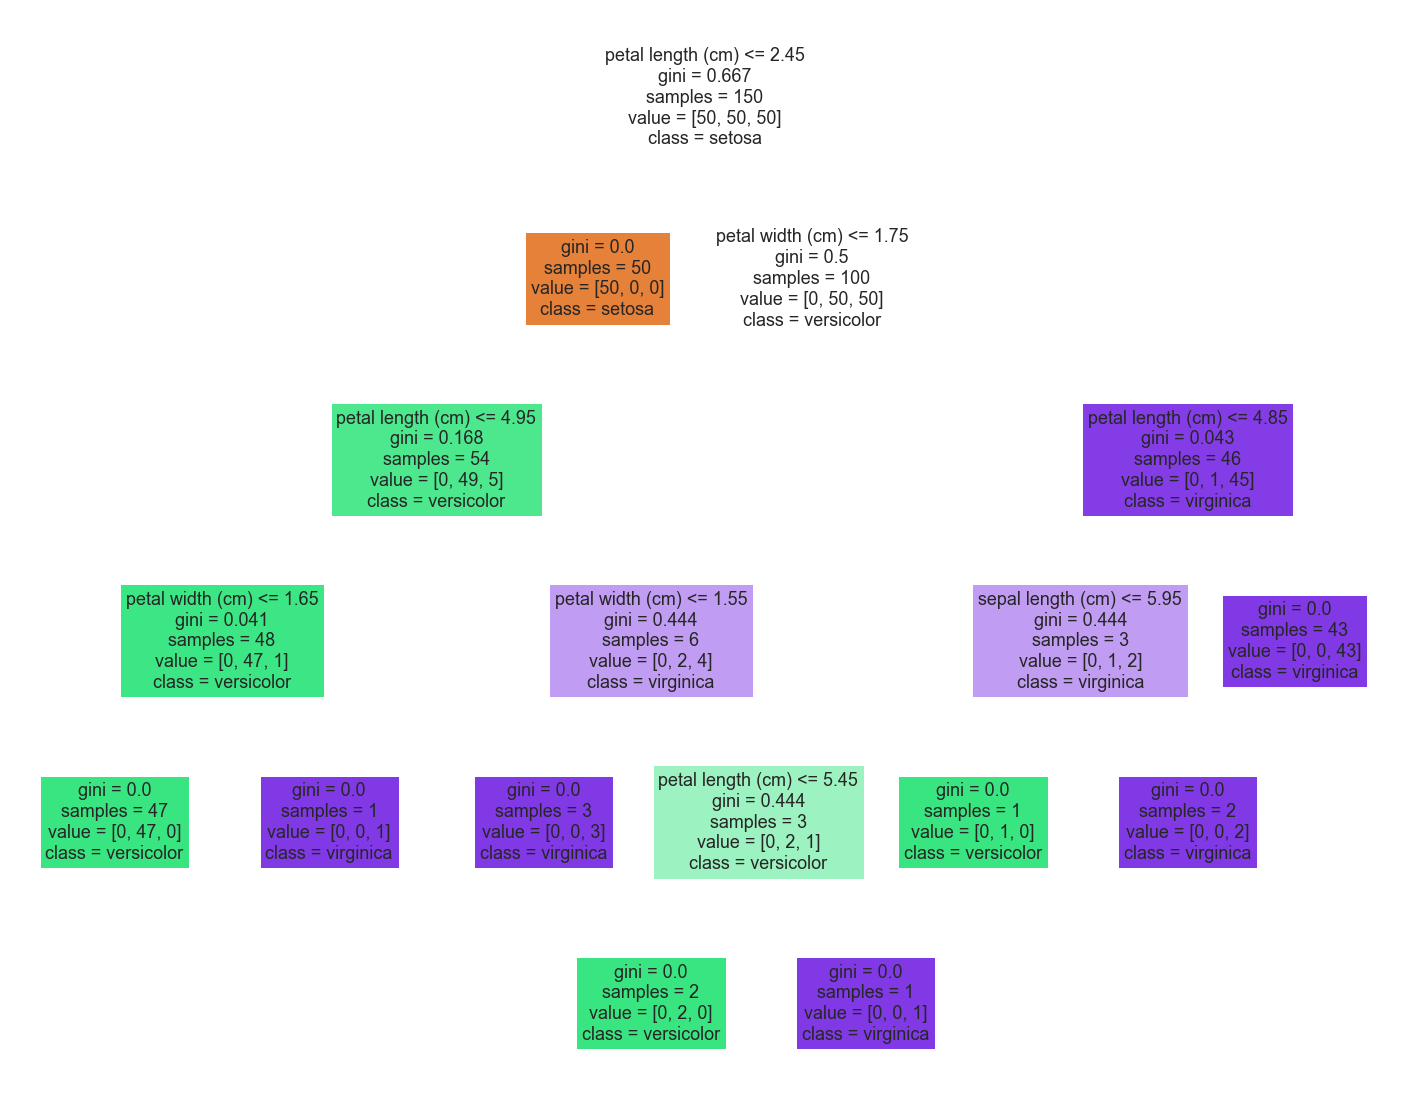

In [6]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

**We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**

### Checking Relation and Accuracy

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

<Figure size 720x720 with 0 Axes>

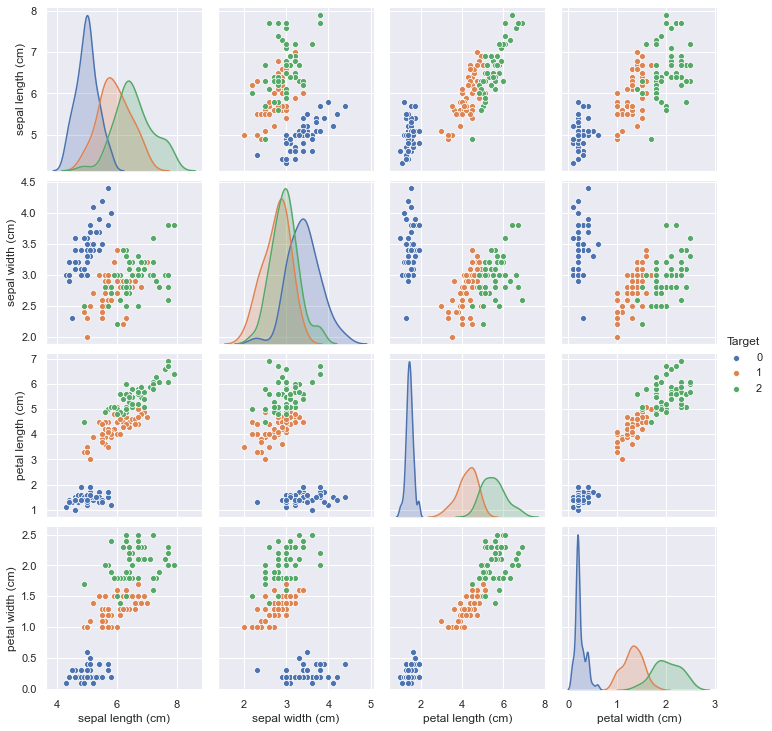

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='Target')
plt.show()

<Figure size 720x576 with 0 Axes>

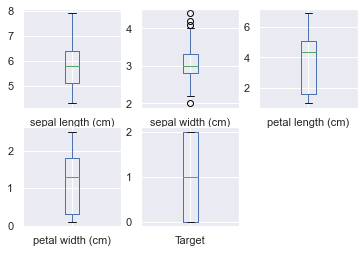

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=[10,8])
df.plot(kind="box",subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [12]:
dt_predict=dtree.predict(data)

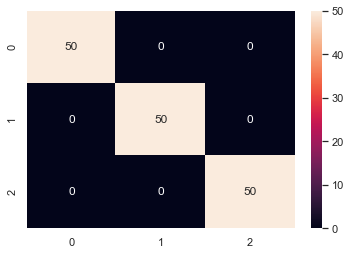

In [13]:
# Creating the heatmap
sns.heatmap(confusion_matrix(y,dt_predict),annot=True)

In [14]:
#classification report
classificationreport = classification_report(y,dt_predict)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [15]:
#accuracy 
accuracy = accuracy_score(y,dt_predict)
print("Accuracy is:",accuracy)

Accuracy is: 1.0


### Train Test Split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(data,y,random_state=123,test_size=0.2)

In [17]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [18]:
dt_predict=dtree.predict(xtest)

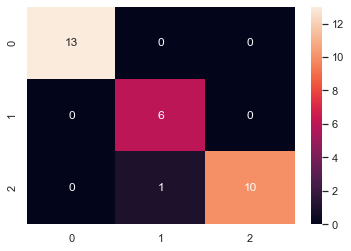

In [19]:
sns.heatmap(confusion_matrix(ytest,dt_predict),annot=True)

In [20]:
#classification report
classificationreport = classification_report(ytest,dt_predict)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [21]:
# Accuracy 
accuracy = accuracy_score(ytest,dt_predict)
print("Accuracy is:",accuracy)

Accuracy is: 0.9666666666666667


### The accuracy is 96% for the decision tree algorithm.